# Obsessed with Boba? Analyzing Bubble Tea Shops in NYC Using the Yelp Fusion API
### Boba Maps of NYC

In [1]:
### Imports for Google Colab Session

# # imports for Google Colab Sessions
# !apt install gdal-bin python-gdal python3-gdal 
# # Install rtree - Geopandas requirment
# !apt install python3-rtree 
# # Install Geopandas
# !pip install git+git://github.com/geopandas/geopandas.git
# # Install descartes - Geopandas requirment
# !pip install descartes 

In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

C:\Users\datal\anaconda3\envs\boba-nyc\lib\site-packages\pyproj\__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [3]:
url = 'https://raw.githubusercontent.com/mebauer/boba-nyc/master/teabook/boba-nyc.csv'
df = pd.read_csv(url)
df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance,latitude,longitude,geometry
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...","['pickup', 'delivery']",$$,"{'address1': '208 Grand St', 'address2': None,...",1.646559e+10,(646) 559-2886,1535.241614,40.719174,-73.996220,POINT (-73.9962197 40.7191742)
1,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}","['pickup', 'delivery']",$$,"{'address1': '26B Elizabeth St', 'address2': '...",1.212420e+10,(212) 420-0123,1212.877370,40.716170,-73.997100,POINT (-73.9971 40.71617)
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,32,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}","['pickup', 'delivery']",$$,"{'address1': '23 Clinton St', 'address2': None...",NaN,NaN,1877.016204,40.720597,-73.984539,POINT (-73.984539 40.720597)
3,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}","['pickup', 'delivery']",NaN,"{'address1': '133 2nd Ave', 'address2': '', 'a...",NaN,NaN,2656.450427,40.728800,-73.987750,POINT (-73.98775000000001 40.7288)
4,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,60,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}","['pickup', 'delivery']",NaN,"{'address1': '32 Union Square E', 'address2': ...",1.646767e+10,(646) 767-0085,3367.900728,40.735516,-73.989191,POINT (-73.98919100000001 40.735516)


In [4]:
df.describe()

,review_count,rating,phone,distance,latitude,longitude
count,414.000000,414.000000,3.620000e+02,414.000000,414.000000,414.000000
mean,89.722222,3.985507,1.613962e+10,8980.359386,40.716170,-73.941997
std,116.765312,0.608481,2.375761e+09,5684.076763,0.058255,0.084129
min,1.000000,1.000000,1.201432e+10,953.875131,40.537609,-74.166080
25%,16.250000,3.500000,1.347732e+10,3954.891025,40.689505,-73.994920
50%,49.000000,4.000000,1.718286e+10,8254.243639,40.731610,-73.975096
75%,109.000000,4.500000,1.718886e+10,13019.588280,40.757300,-73.880179
max,740.000000,5.000000,1.934235e+10,25132.157979,40.886959,-73.702410


In [5]:
df.describe(include=['O']).T

,count,unique,top,freq
id,414,414,Q3fmTHT7zilDWtfzLK9lMA,1
alias,414,414,truedan-new-york-3,1
name,414,259,Kung Fu Tea,26
image_url,409,409,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,1
url,414,414,https://www.yelp.com/biz/truedan-new-york-3?ad...,1
categories,414,177,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",115
coordinates,414,409,"{'latitude': 40.71697, 'longitude': -73.99471}",2
transactions,414,5,"['pickup', 'delivery']",229
price,258,3,$,166
location,414,411,"{'address1': '90-15 Queens Blvd', 'address2': ...",2


## Map boba data for NYC neighborhoods

In [6]:
# read neighborhood data as geodataframe
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile'
neighborhoods = gpd.read_file(url)
neighborhoods.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904856,"POLYGON ((-73.80379 40.77561, -73.80099 40.775..."
1,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711894,"POLYGON ((-73.86110 40.76366, -73.85993 40.762..."
2,4.0,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73019, -73.77849 40.729..."
3,1.0,Manhattan,061,MN17,Midtown-Midtown South,3.019153e+07,27032.700375,"POLYGON ((-73.97301 40.76428, -73.97141 40.763..."
4,2.0,Bronx,005,BX09,Soundview-Castle Hill-Clason Point-Harding Park,5.198380e+07,67340.977626,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ..."


In [7]:
# re-project neighborhood data
neighborhoods = neighborhoods.to_crs('EPSG:4326')

# open the boba dataframe as geo data frame using the lat-long info in the data
gdf = gpd.GeoDataFrame(df, crs=neighborhoods.crs, geometry=gpd.points_from_xy(df.longitude, df.latitude))

print(neighborhoods.crs)
print(gdf.crs)

CRSError: Invalid projection: EPSG:4326: (Internal Proj Error: proj_create: no database context specified)

In [10]:
# join the neighborhood information to each boba shop
join_df = gpd.sjoin(gdf, neighborhoods, how="left")
print(join_df.shape)
join_df.head()

(414, 27)


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,...,longitude,geometry,index_right,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...",...,-73.996220,POINT (-73.99622 40.71917),94,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031527
1,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}",...,-73.997100,POINT (-73.99710 40.71617),88,1.0,Manhattan,061,MN27,Chinatown,1.450188e+07,20786.254332
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,32,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}",...,-73.984539,POINT (-73.98454 40.72060),88,1.0,Manhattan,061,MN27,Chinatown,1.450188e+07,20786.254332
3,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}",...,-73.987750,POINT (-73.98775 40.72880),139,1.0,Manhattan,061,MN22,East Village,1.089424e+07,13555.232094
4,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,60,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}",...,-73.989191,POINT (-73.98919 40.73552),32,1.0,Manhattan,061,MN21,Gramercy,7.526916e+06,12096.891148


In [11]:
# get the counts of boba shops groupped by neighborhood names
nt_count = join_df.groupby(by='ntaname')['id'].count().sort_values(ascending=True)
nt_count = nt_count.reset_index()
nt_count.columns = ['ntaname', 'counts']
nt_count.describe()

,counts
count,93.000000
mean,4.451613
std,6.289253
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,40.000000


In [12]:
# get the average ratings of boba shops groupped by neighborhood names
nt_rating = join_df.groupby(by='ntaname')['rating'].mean().sort_values(ascending=True)
nt_rating = nt_rating.reset_index()
nt_rating.columns = ['ntaname','rating']
nt_rating.describe()

,rating
count,93.000000
mean,4.018089
std,0.472595
min,2.000000
25%,3.833333
50%,4.000000
75%,4.333333
max,5.000000


In [13]:
# get the average ratings of boba shops groupped by neighborhood names
nt_revcount = join_df.groupby(by='ntaname')['review_count'].sum().sort_values(ascending=True)
nt_revcount = nt_revcount.reset_index()
nt_revcount.columns = ['ntaname','review_count']
nt_revcount.describe()

,review_count
count,93.000000
mean,399.408602
std,812.981820
min,1.000000
25%,32.000000
50%,114.000000
75%,384.000000
max,5093.000000


In [14]:
# merge the counts, ratings, review counts by neighborhood dataframe to the neighborhood geodataframe, which contains spatial information of the neighborhoods
group_nt_gdf = neighborhoods.merge(nt_count, how="left", left_on='ntaname', right_on='ntaname')
group_nt_gdf = group_nt_gdf.merge(nt_rating, how="left", left_on='ntaname', right_on='ntaname')
group_nt_gdf = group_nt_gdf.merge(nt_revcount, how="left", left_on='ntaname', right_on='ntaname')

group_nt_gdf.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,counts,rating,review_count
0,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904856,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",4.0,4.250000,56.0
1,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711894,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",NaN,NaN,NaN
2,4.0,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73019, -73.77849 40.729...",5.0,4.000000,338.0
3,1.0,Manhattan,061,MN17,Midtown-Midtown South,3.019153e+07,27032.700375,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",15.0,3.833333,2564.0
4,2.0,Bronx,005,BX09,Soundview-Castle Hill-Clason Point-Harding Park,5.198380e+07,67340.977626,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ...",NaN,NaN,NaN


In [15]:
# get the lat-long of the centroid of each neighborhood ("label_geometry") for labeling
group_nt_gdf['label_geometry'] = group_nt_gdf['geometry'].centroid
group_nt_gdf.sort_values('counts', ascending=True)
group_nt_gdf.head()

C:\Users\datal\AppData\Local\Temp\ipykernel_14736\2953681496.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  group_nt_gdf['label_geometry'] = group_nt_gdf['geometry'].centroid


,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,counts,rating,review_count,label_geometry
0,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904856,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",4.0,4.250000,56.0,POINT (-73.80955 40.76835)
1,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711894,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",NaN,NaN,NaN,POINT (-73.86840 40.76335)
2,4.0,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73019, -73.77849 40.729...",5.0,4.000000,338.0,POINT (-73.78372 40.73489)
3,1.0,Manhattan,061,MN17,Midtown-Midtown South,3.019153e+07,27032.700375,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",15.0,3.833333,2564.0,POINT (-73.98350 40.75573)
4,2.0,Bronx,005,BX09,Soundview-Castle Hill-Clason Point-Harding Park,5.198380e+07,67340.977626,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ...",NaN,NaN,NaN,POINT (-73.85619 40.81805)


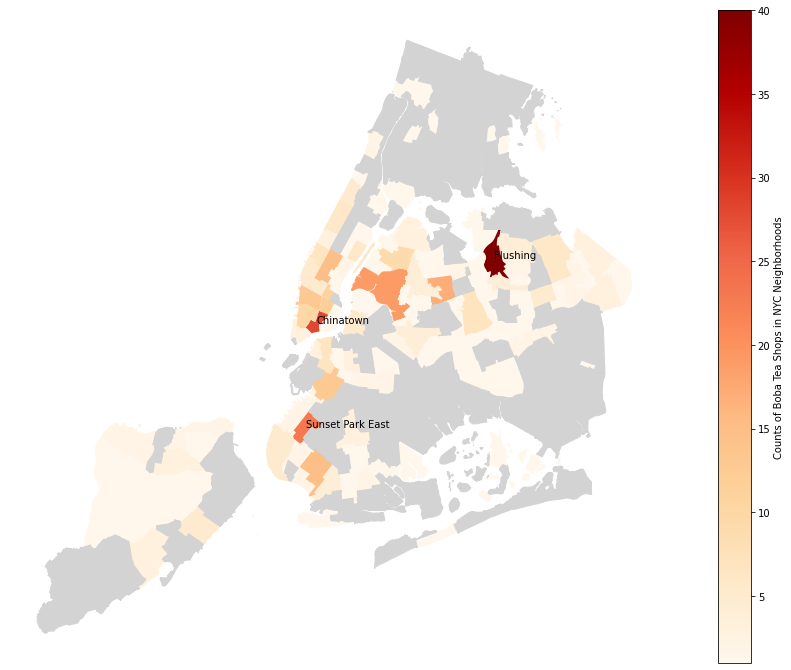

In [16]:
# create a choropleth map of boba shop counts in NYC neighborhoods

fig, ax = plt.subplots(figsize=(20, 12))
missing_kwds={"color": "lightgrey","edgecolor": "lightgrey","label": "Missing values"}
group_nt_gdf.plot(ax=ax, column='counts', cmap='OrRd', edgecolor="none", linewidth=1, legend=True, legend_kwds = {'label': "Counts of Boba Tea Shops in NYC Neighborhoods"}, missing_kwds=missing_kwds)

# lebel the top 3 neighborhoods
top_counts = group_nt_gdf.sort_values("counts", ascending=False)[0:3]
for x, y, label in zip(top_counts.label_geometry.x, top_counts.label_geometry.y, top_counts.ntaname):
    ax.annotate(label, xy=(x, y))

ax.set_axis_off()

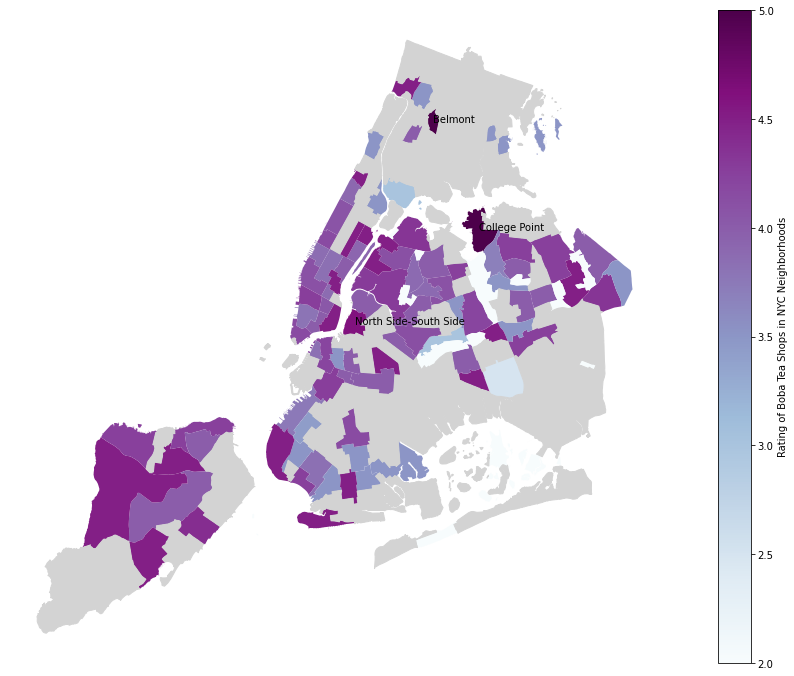

In [17]:
# create a choropleth map of average boba shop ratings in NYC neighborhoods

fig, ax = plt.subplots(figsize=(20, 12))
missing_kwds={"color": "lightgrey","edgecolor": "lightgrey","label": "Missing values"}
group_nt_gdf.plot(
    ax=ax, column='rating', cmap='BuPu', edgecolor="none", linewidth=1, legend=True,
    legend_kwds = {'label': "Rating of Boba Tea Shops in NYC Neighborhoods"}, missing_kwds=missing_kwds)

# lebel the top 3 neighborhoods
top_rated = group_nt_gdf.sort_values("rating", ascending=False)[0:3]
for x, y, label in zip(top_rated.label_geometry.x, top_rated.label_geometry.y, top_rated.ntaname):
    ax.annotate(label, xy=(x, y))
ax.set_axis_off()

''

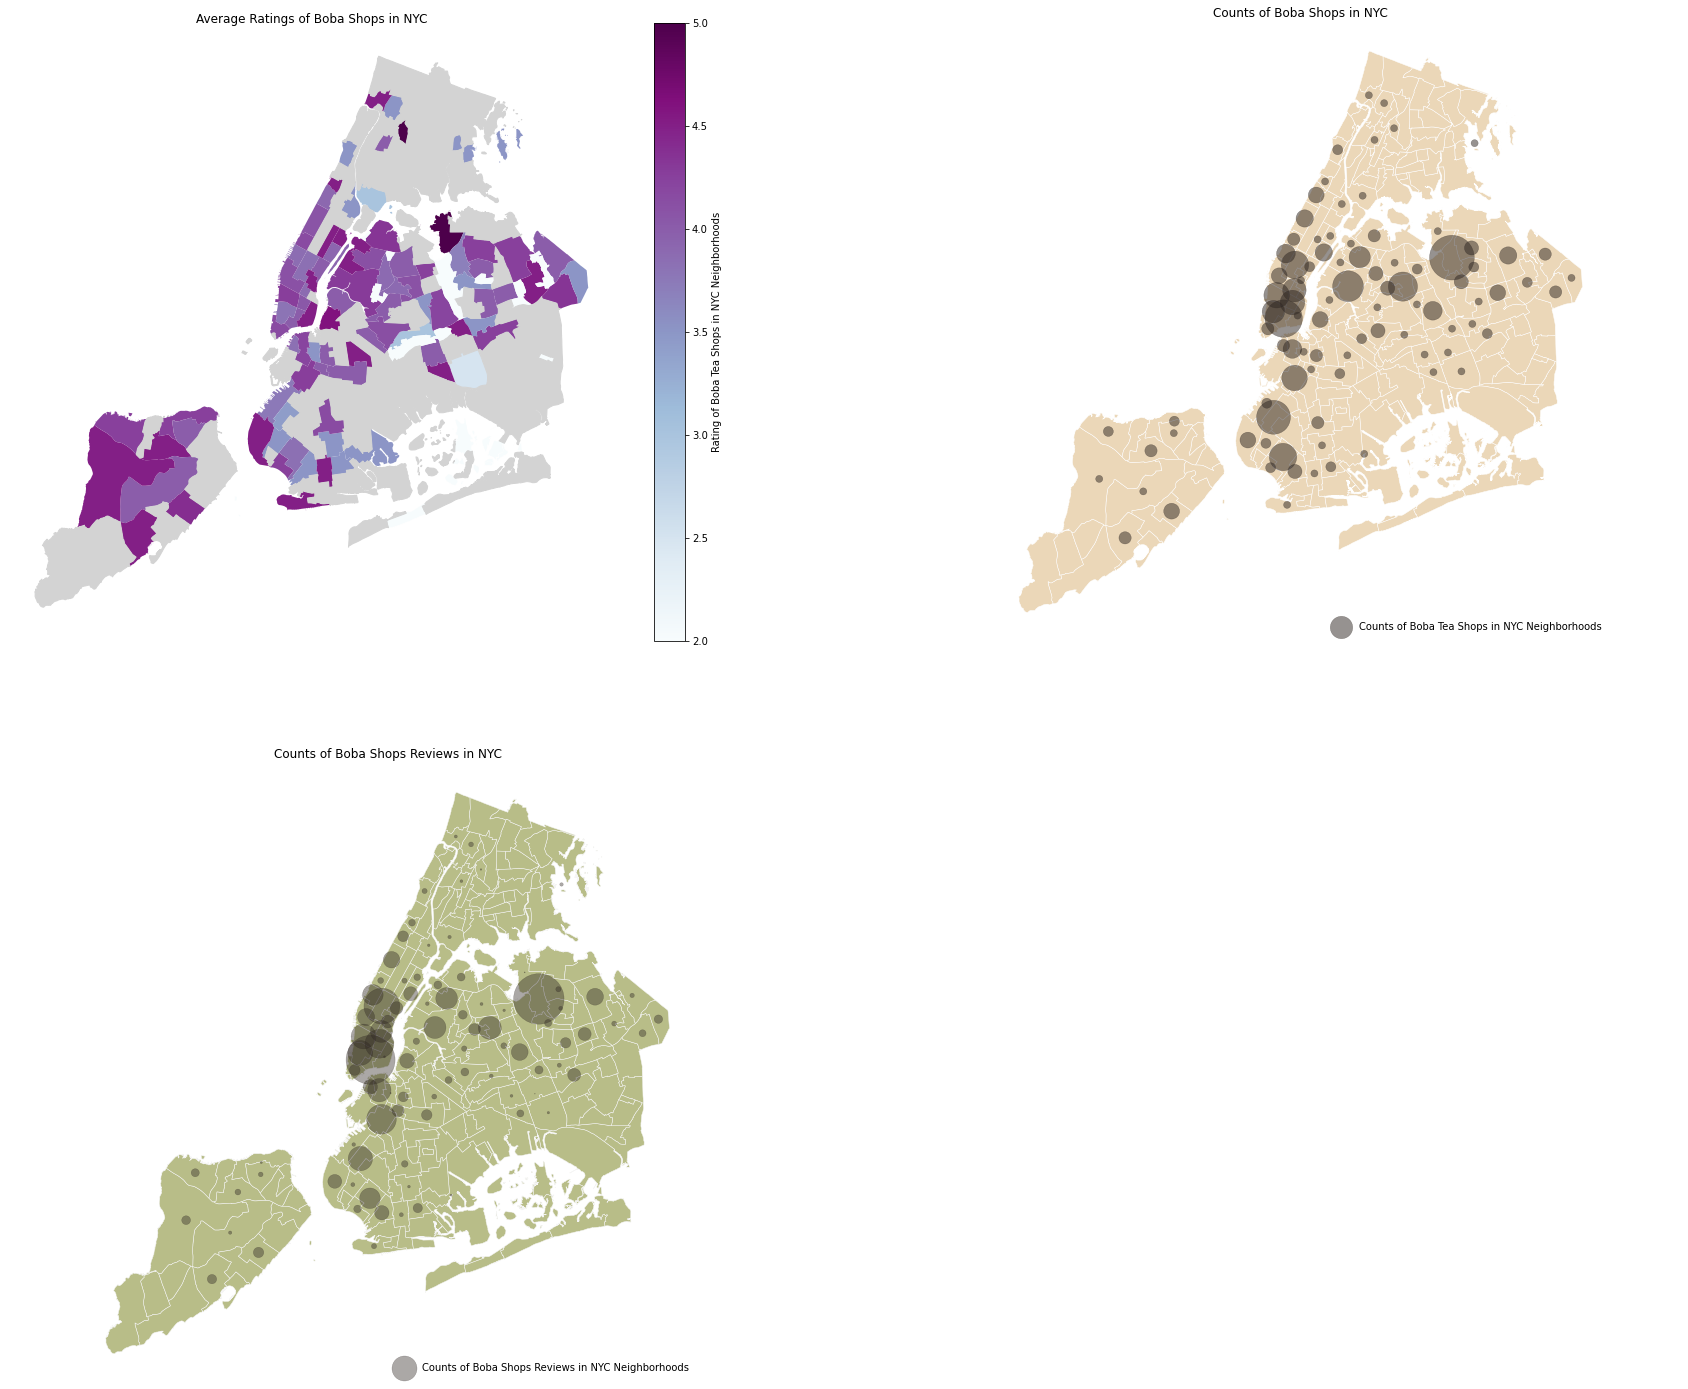

In [19]:
# Put the maps side to side..
# create a choropleth map of boba shop ratings in NYC neighborhoods
# and proportional symbol maps of boba shop counts and boba shop review counts in NYC neighborhoods

fig, ax = plt.subplots(2, 2, figsize=(30, 25))


# draw average rating of boba tea shops
ax[0][0].title.set_text('Average Ratings of Boba Shops in NYC')
missing_kwds={"color": "lightgrey","edgecolor": "lightgrey","label": "Missing values"}
group_nt_gdf.plot(ax=ax[0][0], 
    column='rating',
    cmap='BuPu',
    edgecolor="none", 
    linewidth=1,
    legend=True,
    legend_kwds = {
        'label': "Rating of Boba Tea Shops in NYC Neighborhoods"
    }, 
    missing_kwds = missing_kwds
)

# To create proportional symbol maps,
# create a copy of the geodataframe using the centroids coordinate as the geometry
group_nt_gdf_pt = group_nt_gdf.copy()
group_nt_gdf_pt['geometry'] = group_nt_gdf_pt['label_geometry']
group_nt_gdf_pt.head()


# draw counts of boba tea shops
ax[0][1].title.set_text('Counts of Boba Shops in NYC')
neighborhoods.plot(ax=ax[0][1], color="#ebd7b8", edgecolor="white",linewidth=0.5, alpha=1)
group_nt_gdf_pt.plot(
    ax=ax[0][1], color="#2e2622", markersize=group_nt_gdf_pt.counts * 50, alpha=0.5, edgecolor='#2e2622', linewidth=0.4, legend=True, label="Counts of Boba Tea Shops in NYC Neighborhoods")


# draw counts of reviews
ax[1][0].title.set_text('Counts of Boba Shops Reviews in NYC')
neighborhoods.plot(ax=ax[1][0], color="#b8bd88", edgecolor="whitesmoke",linewidth=0.5, alpha=1)
group_nt_gdf_pt.plot(
    ax=ax[1][0], color="#2e2622", markersize=group_nt_gdf_pt.review_count / 2, alpha=0.4, edgecolor='#2e2622', linewidth=0.4, legend=True, label="Counts of Boba Shops Reviews in NYC Neighborhoods")

ax[0][0].set_axis_off()
ax[0][1].set_axis_off()
ax[1][0].set_axis_off()
ax[1][1].set_axis_off()

ax[0][1].legend(loc='lower right', markerscale=0.7, frameon=False)
ax[1][0].legend(loc='lower right', markerscale=0.7, frameon=False)


### The top-rated neighborhoods seem to have low counts of boba shops and count of reviews.

- fewer boba shops...less competition?
- fewer counts of review...less representative rating?

In [18]:
group_nt_gdf[['rating', 'counts', 'review_count']].describe()

,rating,counts,review_count
count,93.000000,93.000000,93.000000
mean,4.018089,4.451613,399.408602
std,0.472595,6.289253,812.981820
min,2.000000,1.000000,1.000000
25%,3.833333,1.000000,32.000000
50%,4.000000,2.000000,114.000000
75%,4.333333,5.000000,384.000000
max,5.000000,40.000000,5093.000000


In [19]:
group_nt_gdf.sort_values("rating", ascending=False).dropna()[0:10]

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,counts,rating,review_count,label_geometry
64,2.0,Bronx,005,BX06,Belmont,1.355635e+07,17104.422131,"POLYGON ((-73.88309 40.86660, -73.88298 40.866...",1.0,5.0,5.0,POINT (-73.88587 40.85778)
103,4.0,Queens,081,QN23,College Point,5.055398e+07,59454.750110,"MULTIPOLYGON (((-73.86788 40.78736, -73.86803 ...",1.0,5.0,2.0,POINT (-73.84281 40.78092)
145,3.0,Brooklyn,047,BK73,North Side-South Side,2.886227e+07,28155.614043,"POLYGON ((-73.95814 40.72440, -73.95772 40.724...",5.0,4.6,434.0,POINT (-73.95862 40.71492)
122,5.0,Staten Island,085,SI07,Westerleigh,6.325658e+07,41655.704816,"POLYGON ((-74.13047 40.63089, -74.13014 40.629...",3.0,4.5,68.0,POINT (-74.12535 40.61688)
81,4.0,Queens,081,QN71,Old Astoria,1.562046e+07,19367.656081,"POLYGON ((-73.92828 40.77690, -73.92785 40.776...",1.0,4.5,124.0,POINT (-73.92833 40.77157)
63,3.0,Brooklyn,047,BK35,Stuyvesant Heights,3.140694e+07,28239.081099,"POLYGON ((-73.91805 40.68721, -73.91800 40.686...",1.0,4.5,49.0,POINT (-73.93189 40.68817)
97,1.0,Manhattan,061,MN28,Lower East Side,2.329937e+07,26518.511656,"MULTIPOLYGON (((-73.98237 40.70554, -73.98246 ...",1.0,4.5,8.0,POINT (-73.98091 40.71784)
100,4.0,Queens,081,QN68,Queensbridge-Ravenswood-Long Island City,2.331294e+07,27228.382705,"POLYGON ((-73.93453 40.77118, -73.93425 40.771...",1.0,4.5,27.0,POINT (-73.93875 40.75756)
109,1.0,Manhattan,061,MN06,Manhattanville,1.073480e+07,17357.246731,"POLYGON ((-73.94608 40.82126, -73.94640 40.820...",1.0,4.5,90.0,POINT (-73.95382 40.81802)
52,2.0,Bronx,005,BX29,Spuyten Duyvil-Kingsbridge,2.321411e+07,27990.757219,"POLYGON ((-73.89788 40.89028, -73.89827 40.889...",1.0,4.5,19.0,POINT (-73.91067 40.88241)


## NYC Neighborhood Boba Index

### - that take into account counts of reviews and counts of boba shops in the neighborhood?

In [20]:
# make a copy of the boba dataframe
join_df2 = join_df.copy()

In [21]:
# make a copy of the neighborhoods geodataframe 
group_nt_gdf2 = group_nt_gdf[['boro_name', 'ntaname', 'geometry', 'label_geometry']].copy()
group_nt_gdf2.head()

,boro_name,ntaname,geometry,label_geometry
0,Queens,Murray Hill,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",POINT (-73.80955 40.76835)
1,Queens,East Elmhurst,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",POINT (-73.86840 40.76335)
2,Queens,Fresh Meadows-Utopia,"POLYGON ((-73.77758 40.73019, -73.77849 40.729...",POINT (-73.78372 40.73489)
3,Manhattan,Midtown-Midtown South,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",POINT (-73.98350 40.75573)
4,Bronx,Soundview-Castle Hill-Clason Point-Harding Park,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ...",POINT (-73.85619 40.81805)


In [22]:
join_df2['rate_rev'] = join_df2['rating'] * join_df2['review_count']
join_df2.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,...,geometry,index_right,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,rate_rev
0,Q3fmTHT7zilDWtfzLK9lMA,truedan-new-york-3,Truedan,https://s3-media2.fl.yelpcdn.com/bphoto/BmUZXO...,False,https://www.yelp.com/biz/truedan-new-york-3?ad...,99,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7191742, 'longitude': -73.9962...",...,POINT (-73.99622 40.71917),94,1.0,Manhattan,061,MN24,SoHo-TriBeCa-Civic Center-Little Italy,2.503268e+07,26855.031527,445.5
1,7-bx74TooPuZKZDNW4WFcQ,chun-yang-tea-new-york,Chun Yang Tea,https://s3-media1.fl.yelpcdn.com/bphoto/JrGwrZ...,False,https://www.yelp.com/biz/chun-yang-tea-new-yor...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.71617, 'longitude': -73.9971}",...,POINT (-73.99710 40.71617),88,1.0,Manhattan,061,MN27,Chinatown,1.450188e+07,20786.254332,409.5
2,3aypSFXLfkAL4dhHVFobKg,lazy-sundaes-new-york-6,Lazy Sundaes,https://s3-media3.fl.yelpcdn.com/bphoto/kEfCYC...,False,https://www.yelp.com/biz/lazy-sundaes-new-york...,32,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",4.5,"{'latitude': 40.720597, 'longitude': -73.984539}",...,POINT (-73.98454 40.72060),88,1.0,Manhattan,061,MN27,Chinatown,1.450188e+07,20786.254332,144.0
3,bVJQEeRNi34-3XN_F1AZEg,xing-fu-tang-new-york,Xing Fu Tang,https://s3-media2.fl.yelpcdn.com/bphoto/cyFHFE...,False,https://www.yelp.com/biz/xing-fu-tang-new-york...,91,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.5,"{'latitude': 40.7288, 'longitude': -73.98775}",...,POINT (-73.98775 40.72880),139,1.0,Manhattan,061,MN22,East Village,1.089424e+07,13555.232094,409.5
4,zupVwJAFYkHDwrsQd2ktXA,fiftylan-union-square-new-york-3,FIFTYLAN Union Square,https://s3-media3.fl.yelpcdn.com/bphoto/UIwR20...,False,https://www.yelp.com/biz/fiftylan-union-square...,60,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}]",4.0,"{'latitude': 40.735516, 'longitude': -73.989191}",...,POINT (-73.98919 40.73552),32,1.0,Manhattan,061,MN21,Gramercy,7.526916e+06,12096.891148,240.0


In [23]:
# sum up the (rating * review_count) by neighborhood
nt_raterev2 = join_df2.groupby(by='ntaname')['rate_rev'].sum().sort_values(ascending=True)
nt_raterev2 = nt_raterev2.reset_index()
nt_raterev2.columns = ['ntaname','rate_rev']
nt_raterev2.head()

,ntaname,rate_rev
0,park-cemetery-etc-Queens,2.0
1,College Point,10.0
2,Fort Greene,10.5
3,Belmont,25.0
4,Georgetown-Marine Park-Bergen Beach-Mill Basin,28.0


In [24]:
# merge to the neighborhood geodataframe
group_nt_gdf2 = group_nt_gdf2.merge(nt_count, how='left', left_on='ntaname', right_on='ntaname')
group_nt_gdf2 = group_nt_gdf2.merge(nt_rating, how='left', left_on='ntaname', right_on='ntaname')
group_nt_gdf2 = group_nt_gdf2.merge(nt_revcount, how='left', left_on='ntaname', right_on='ntaname')

group_nt_gdf2 = group_nt_gdf2.merge(nt_raterev2, how='left', left_on='ntaname', right_on='ntaname')

group_nt_gdf2.head()

,boro_name,ntaname,geometry,label_geometry,counts,rating,review_count,rate_rev
0,Queens,Murray Hill,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",POINT (-73.80955 40.76835),4.0,4.250000,56.0,245.0
1,Queens,East Elmhurst,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",POINT (-73.86840 40.76335),NaN,NaN,NaN,NaN
2,Queens,Fresh Meadows-Utopia,"POLYGON ((-73.77758 40.73019, -73.77849 40.729...",POINT (-73.78372 40.73489),5.0,4.000000,338.0,1230.5
3,Manhattan,Midtown-Midtown South,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",POINT (-73.98350 40.75573),15.0,3.833333,2564.0,9598.5
4,Bronx,Soundview-Castle Hill-Clason Point-Harding Park,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ...",POINT (-73.85619 40.81805),NaN,NaN,NaN,NaN


### The creation of Boba Index...

In [25]:
group_nt_gdf2['boba_index'] = (

    # review counts-weighted rating...
    group_nt_gdf2['rate_rev']                        # sum of (rating * review counts) in neighborhood
    / group_nt_gdf2['review_count']                  # / (the total review counts in neighborhood)

    # consider competition...
    * np.sqrt(group_nt_gdf2['counts'])               # * (square root of total boba shop count in neighborhood)
    / (np.sqrt(group_nt_gdf2['counts'])).mean()      # / (mean of square root boba shop count in whole NYC)

)

group_nt_gdf2.head()

,boro_name,ntaname,geometry,label_geometry,counts,rating,review_count,rate_rev,boba_index
0,Queens,Murray Hill,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",POINT (-73.80955 40.76835),4.0,4.250000,56.0,245.0,4.826066
1,Queens,East Elmhurst,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",POINT (-73.86840 40.76335),NaN,NaN,NaN,NaN,NaN
2,Queens,Fresh Meadows-Utopia,"POLYGON ((-73.77758 40.73019, -73.77849 40.729...",POINT (-73.78372 40.73489),5.0,4.000000,338.0,1230.5,4.489884
3,Manhattan,Midtown-Midtown South,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",POINT (-73.98350 40.75573),15.0,3.833333,2564.0,9598.5,7.996799
4,Bronx,Soundview-Castle Hill-Clason Point-Harding Park,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ...",POINT (-73.85619 40.81805),NaN,NaN,NaN,NaN,NaN


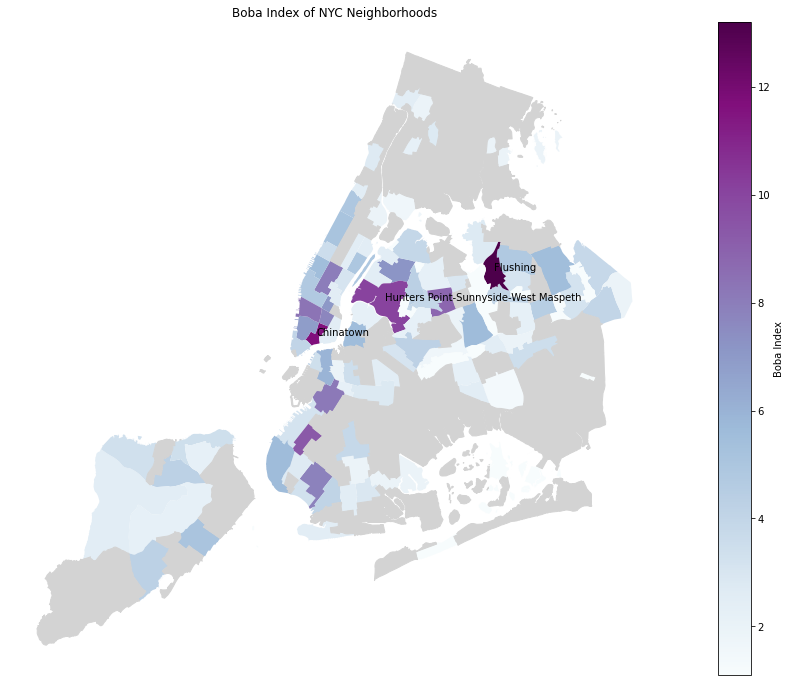

In [26]:
# create a choropleth map of Baba Index in NYC neighborhoods

fig, ax = plt.subplots(figsize=(20, 12), sharey=False)

ax.title.set_text('Boba Index of NYC Neighborhoods')
missing_kwds={"color": "lightgrey","edgecolor": "lightgrey","label": "Missing values"}
group_nt_gdf2.plot(
    ax=ax, column='boba_index', cmap='BuPu', edgecolor="none", linewidth=1, legend=True,
    legend_kwds = {'label': "Boba Index"}, missing_kwds=missing_kwds)

top_rated = group_nt_gdf2.sort_values("boba_index", ascending=False)[0:3]
for x, y, label in zip(top_rated.label_geometry.x, top_rated.label_geometry.y, top_rated.ntaname):
    ax.annotate(label, xy=(x, y))

ax.set_axis_off()

In [27]:
group_nt_gdf2.sort_values("boba_index", ascending=False).dropna()[0:10]


,boro_name,ntaname,geometry,label_geometry,counts,rating,review_count,rate_rev,boba_index
155,Queens,Flushing,"POLYGON ((-73.82331 40.77958, -73.82355 40.779...",POINT (-73.82887 40.76109),40.0,3.687500,5093.0,19257.0,13.189555
88,Manhattan,Chinatown,"POLYGON ((-73.98382 40.72147, -73.98386 40.721...",POINT (-73.99463 40.71561),28.0,4.000000,4803.0,19208.0,11.671691
166,Queens,Hunters Point-Sunnyside-West Maspeth,"POLYGON ((-73.92563 40.75214, -73.92442 40.752...",POINT (-73.93121 40.73977),19.0,4.289474,970.0,4076.0,10.102397
150,Brooklyn,Sunset Park East,"POLYGON ((-73.98906 40.64412, -73.98978 40.643...",POINT (-74.00465 40.64189),23.0,3.434783,1183.0,4148.5,9.275888
144,Queens,Elmhurst,"POLYGON ((-73.86791 40.74493, -73.86788 40.744...",POINT (-73.87712 40.73949),17.0,4.088235,1048.0,4059.5,8.808885
140,Manhattan,West Village,"POLYGON ((-73.98990 40.73443, -73.98987 40.733...",POINT (-74.00155 40.73305),13.0,4.269231,1232.0,5169.0,8.343585
118,Brooklyn,Park Slope-Gowanus,"POLYGON ((-73.97376 40.68305, -73.97375 40.682...",POINT (-73.98390 40.67123),13.0,4.269231,1764.0,7257.0,8.181170
3,Manhattan,Midtown-Midtown South,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",POINT (-73.98350 40.75573),15.0,3.833333,2564.0,9598.5,7.996799
106,Brooklyn,Bensonhurst West,"POLYGON ((-73.97964 40.61556, -73.98022 40.615...",POINT (-73.99526 40.61222),15.0,3.833333,845.0,3097.5,7.830427
139,Manhattan,East Village,"POLYGON ((-73.98378 40.72154, -73.98382 40.721...",POINT (-73.98593 40.72762),12.0,4.041667,1652.0,6668.5,7.712478


In [28]:
group_nt_gdf2.describe()

,counts,rating,review_count,rate_rev,boba_index
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,4.451613,4.018089,399.408602,1576.779570,3.959228
std,6.289253,0.472595,812.981820,3165.047052,2.340969
min,1.000000,2.000000,1.000000,2.000000,1.103101
25%,1.000000,3.833333,32.000000,124.000000,2.481977
50%,2.000000,4.000000,114.000000,477.500000,3.150041
75%,5.000000,4.333333,384.000000,1470.500000,4.826066
max,40.000000,5.000000,5093.000000,19257.000000,13.189555
